In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [5]:
dados = pd.read_csv("C:/Users/Salomão/Downloads/data.csv")

In [7]:
dados.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


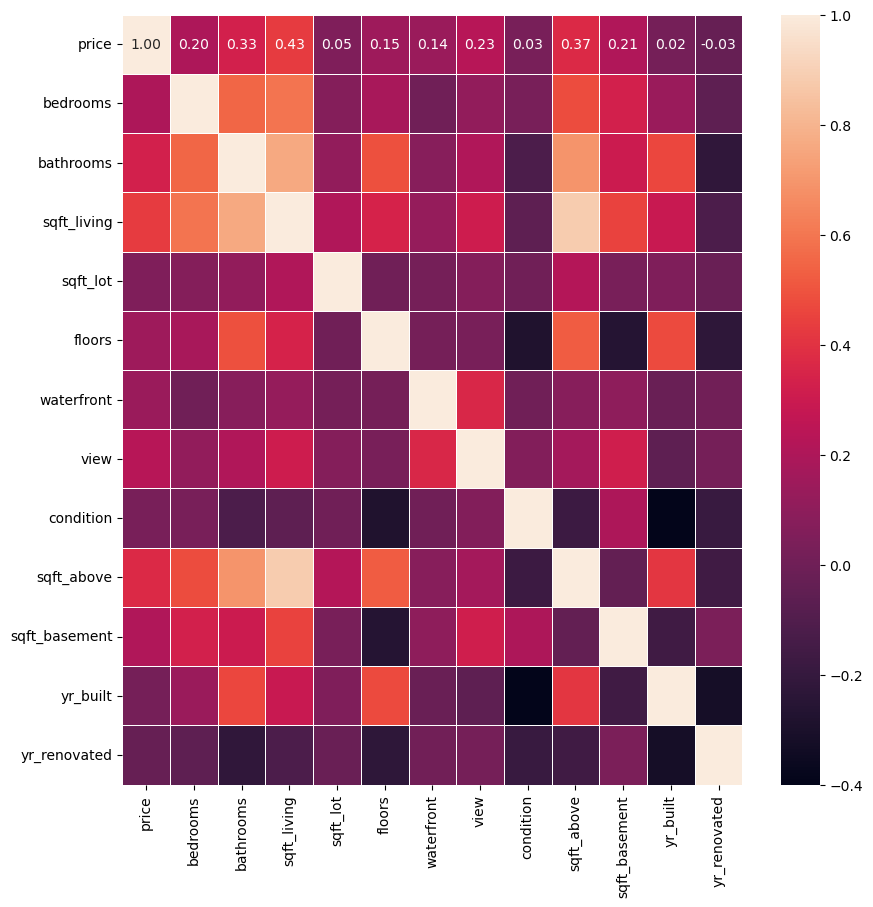

In [27]:
correlation_matrix = dados.corr(numeric_only=True).round(2) 

# Configurar o tamanho da figura
fig, ax = plt.subplots(figsize=(10, 10))

# Criar o heatmap com anotações
sns.heatmap(data=correlation_matrix, annot=True, fmt=".2f", linewidths=.5, ax=ax)

# Mostrar o gráfico
plt.show()

In [21]:
x = dados[["sqft_living","bathrooms"]].values 
y = dados["price"].values

<Axes: xlabel='bathrooms', ylabel='price'>

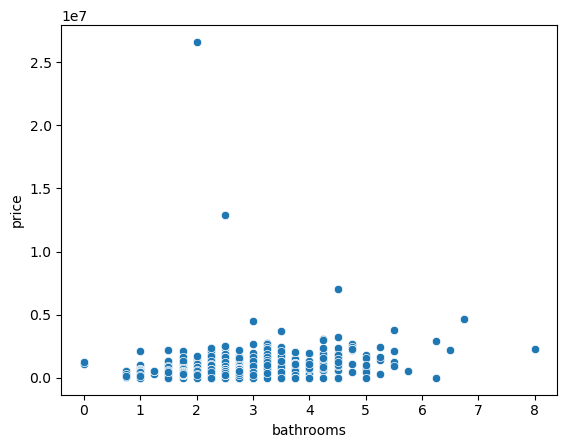

In [31]:
sns.scatterplot(data=dados, x = "bathrooms", y = "price")

<Axes: xlabel='sqft_living', ylabel='price'>

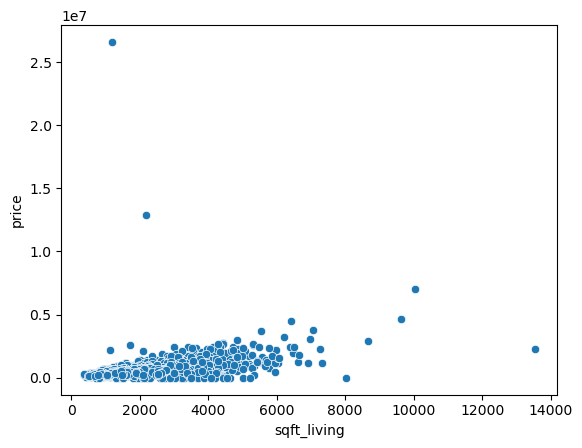

In [33]:
sns.scatterplot(data=dados, x = "sqft_living", y = "price")

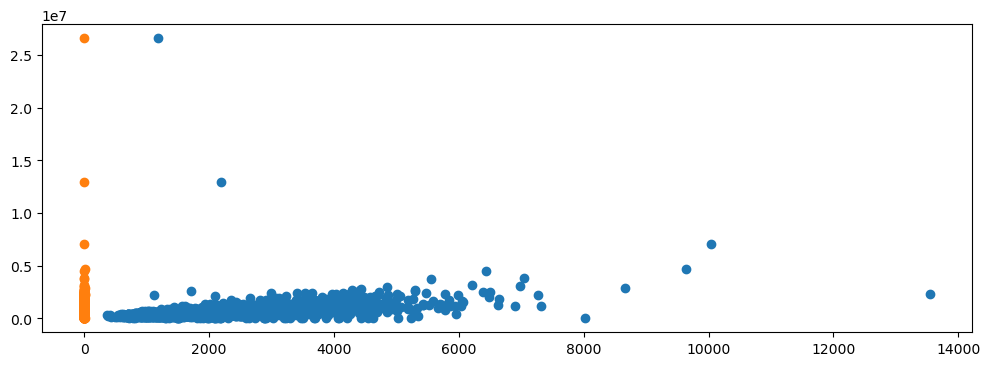

In [37]:
fig, ax = plt.subplots(figsize=(12,4))

ax.scatter(x[:,0],y);
ax.scatter(x[:,1],y);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sqft_living', ylabel='Count'>

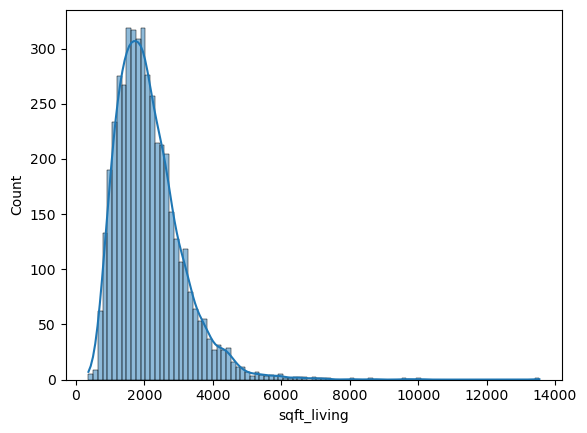

In [39]:
sns.histplot(data=dados, x = "sqft_living",kde=True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bathrooms', ylabel='Count'>

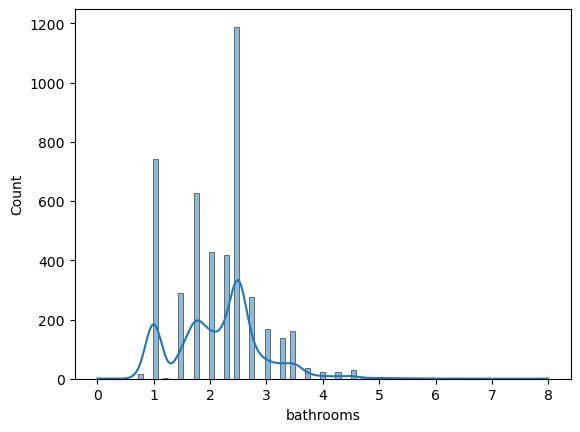

In [41]:
sns.histplot(data=dados, x = "bathrooms",kde=True)

<Axes: >

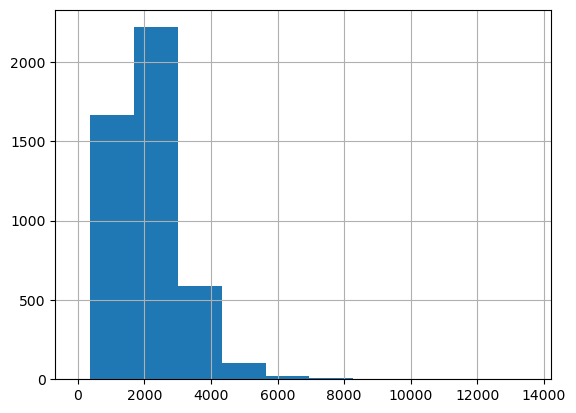

In [43]:
hist_variaveis = pd.DataFrame(dados, columns=["sqft_living","bathrooms"])

hist_variaveis.sqft_living.hist()
hist_variaveis.bathrooms.hist()

In [45]:
#Padronização

scaler = StandardScaler()

x_std = scaler.fit_transform(x)

In [53]:
x

array([[1.34e+03, 1.50e+00],
       [3.65e+03, 2.50e+00],
       [1.93e+03, 2.00e+00],
       ...,
       [3.01e+03, 2.50e+00],
       [2.09e+03, 2.00e+00],
       [1.49e+03, 2.50e+00]])

In [55]:
x_std

array([[-0.82997105, -0.84320364],
       [ 1.56852826,  0.43280154],
       [-0.21736733, -0.20520105],
       ...,
       [ 0.90400897,  0.43280154],
       [-0.05123751, -0.20520105],
       [-0.67422434,  0.43280154]])

<Axes: >

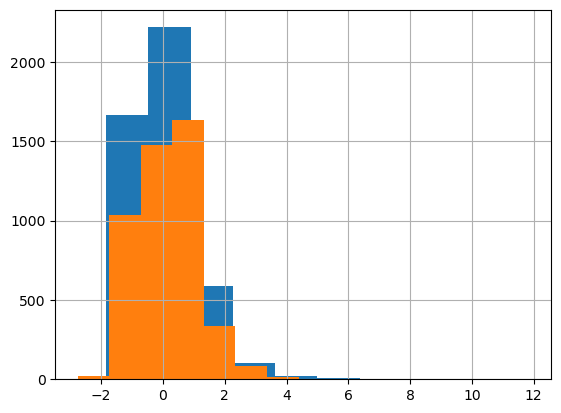

In [57]:
x_std = pd.DataFrame(x_std, columns=["sqft_living", "bathrooms"])
x_std.sqft_living.hist()
x_std.bathrooms.hist()

<Axes: >

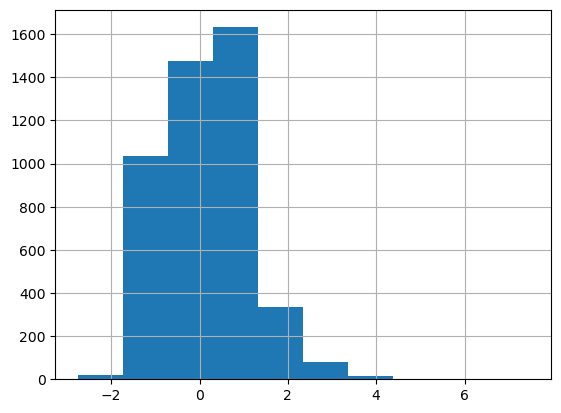

In [59]:
x_std.bathrooms.hist()

<Axes: >

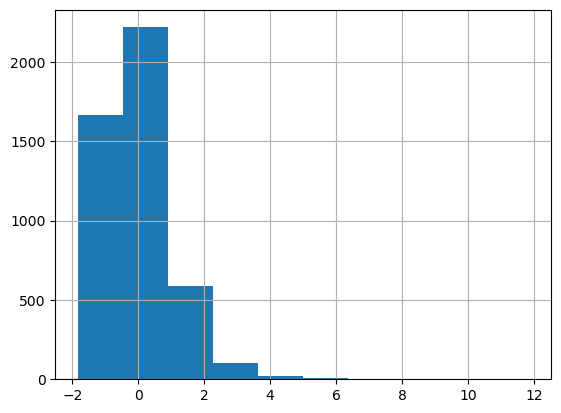

In [61]:
x_std.sqft_living.hist()

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=9)

In [67]:
len(x_train)

3450

In [71]:
len(x_test)

1150

In [75]:
scaler = MinMaxScaler()

scaler.fit(x_test)

MinMaxScaler()

In [73]:
scaler = MinMaxScaler()

scaler.fit(x_train)

MinMaxScaler()

In [77]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [79]:
model = LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [81]:
y_pred = model.predict(x_test_scaled)

In [83]:
MAE = mean_absolute_error(y_test,y_pred) 
r2 = r2_score(y_test, y_pred)
print("MAE :", MAE)
print("r2 :",r2)

MAE : 170985.65995916823
r2 : 0.41250214998998236


In [85]:
model_normal = LinearRegression()
model_normal.fit(x_train,y_train)

LinearRegression()

In [87]:
y_pred_normal = model_normal.predict(x_test)

In [89]:
MAE = mean_absolute_error(y_test,y_pred_normal) 
r2 = r2_score(y_test, y_pred_normal)
print("MAE :", MAE)
print("r2 :",r2)

MAE : 170985.65995916852
r2 : 0.41250214998998147
